<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/BankNoteAuthentication/BankNoteAuthentication_TrainTestSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url="https://raw.githubusercontent.com/santhoshbvsrk/DeepLearning/main/BankNoteAuthentication/banknote_authentication.csv"
df=pd.read_csv(url)
df.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [ ]:
df.shape

(1372, 5)

In [ ]:
  df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


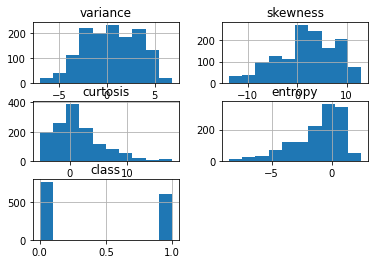

In [ ]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

* From the above plot we can see that there is skewness in data which need to be corrected.

In [ ]:
#preparing feature & target variables
feature_cols=df.drop(columns='class',axis=1) #input variables
target_var=df['class'] #output variable

In [ ]:
#import PowerTransformer to transform data for skewness
from sklearn.preprocessing import PowerTransformer
yeo = PowerTransformer(method='yeo-johnson')
#applying power transform on data to reduce skewness
data_trans=yeo.fit_transform(feature_cols)

In [ ]:
#converting the transformed data from numpy array to dataframe
trans_feature_cols=pd.DataFrame(data_trans,columns=feature_cols.columns.to_list())

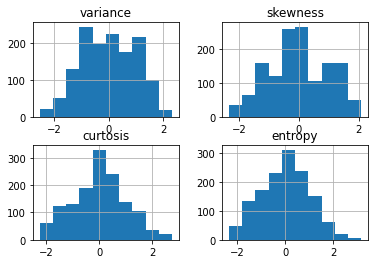

In [ ]:
#Plotting Histogram to see data distribution post transformation
trans_feature_cols.hist()
plt.show()

* From this plot we can say that skewness is curtosis & entropy fields has reduced.

In [ ]:
#checking the percentage of data present for each class in the dataset
df['class'].value_counts()/df['class'].count()

0    0.555394
1    0.444606
Name: class, dtype: float64

* The dataset seems balanced, so we need not perform any data imbalance techniques.
* Let us split data for train and test using StratifiedKFold CV which can be used on imbalance datasets.

---



In [ ]:
X=trans_feature_cols
y=target_var

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [ ]:
print('Imbalance class distribution in YTrain is:\n',trainy.value_counts())
print('Imbalance class distribution in YTest is:\n',testy.value_counts())

Imbalance class distribution in YTrain is:
 0    609
1    488
Name: class, dtype: int64
Imbalance class distribution in YTest is:
 0    153
1    122
Name: class, dtype: int64


In [ ]:
#import tensorflow model and layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#instantiating the model
model = Sequential()
#Adding input layer
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X.shape[1],)))
#Adding output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the model with loss as binary_crossentropy as our target variable is binary
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# fit the model
history = model.fit(trainX, trainy, epochs=50, batch_size=32, verbose=0, validation_data=(testX,testy))
# predict test set
yhat = model.predict_classes(testX)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import accuracy_score
# evaluate predictions
score = accuracy_score(testy, yhat)
print('Accuracy: ',score)

Accuracy:  1.0


* This says that our models accuracy is 100% on test data. 
* Let us plot learning curves of cross-entropy of train & test data

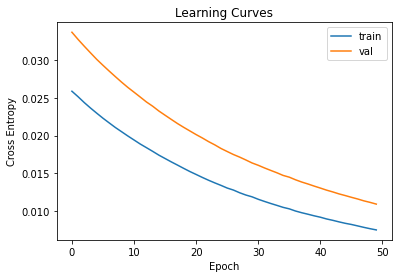

In [ ]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()